# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import numpy as np
import scipy.stats as stats
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px

In [ ]:
try:
    # df = pd.read_csv('/real_estate_data.csv', sep='\t')
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('real_estate_data.csv', delimiter='\\t', engine='python')
    print(df)
#     print('error, try again')

       total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00  2019-03-07T00:00:00      3   
1                 7   3350000.0       40.40  2018-12-04T00:00:00      1   
2                10   5196000.0       56.00  2015-08-20T00:00:00      2   
3                 0  64900000.0      159.00  2015-07-24T00:00:00      3   
4                 2  10000000.0      100.00  2018-06-19T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0                2.70 

In [ ]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Видим колонки:
- `total_images` - сколько всего фотографий загружено
- `last_price` - последняя цена объявления
- `total_area` - общая площадь квартиры
- `first_day_exposition` - день, когда выставили объявление
- `rooms` - количество комнат
- `ceiling_height` - высота потолков
- `floors_total` - количество этажей в доме
- `living_area` - жилая площадь, т.е. площадь за исключением туалета и кухни
- `floor` - этаж, на котором находится квартира
- `is_apartment` - является ли квартира апартаментами
- `studio` - является ли квартира студией
- `open_plan` - открытая ли планировка
- `kitchen_area` - площадь кухни
- `balcony` - количество балконов
- `locality_name` - название города или посёлка
- `airports_nearest` - расстояние до ближайшего аэропорта
- `cityCenters_neares` - расстояние до центра города
- `parks_around3000` - количество парков в радиусе 3 км
- `parks_nearest` - расстояние до ближайшего парка
- `ponds_around3000` - количество прудов в радиусе 3 км
- `ponds_nearest` - расстояние до ближайшего пруда
- `days_exposition` - сколько дней было размещено объявление

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

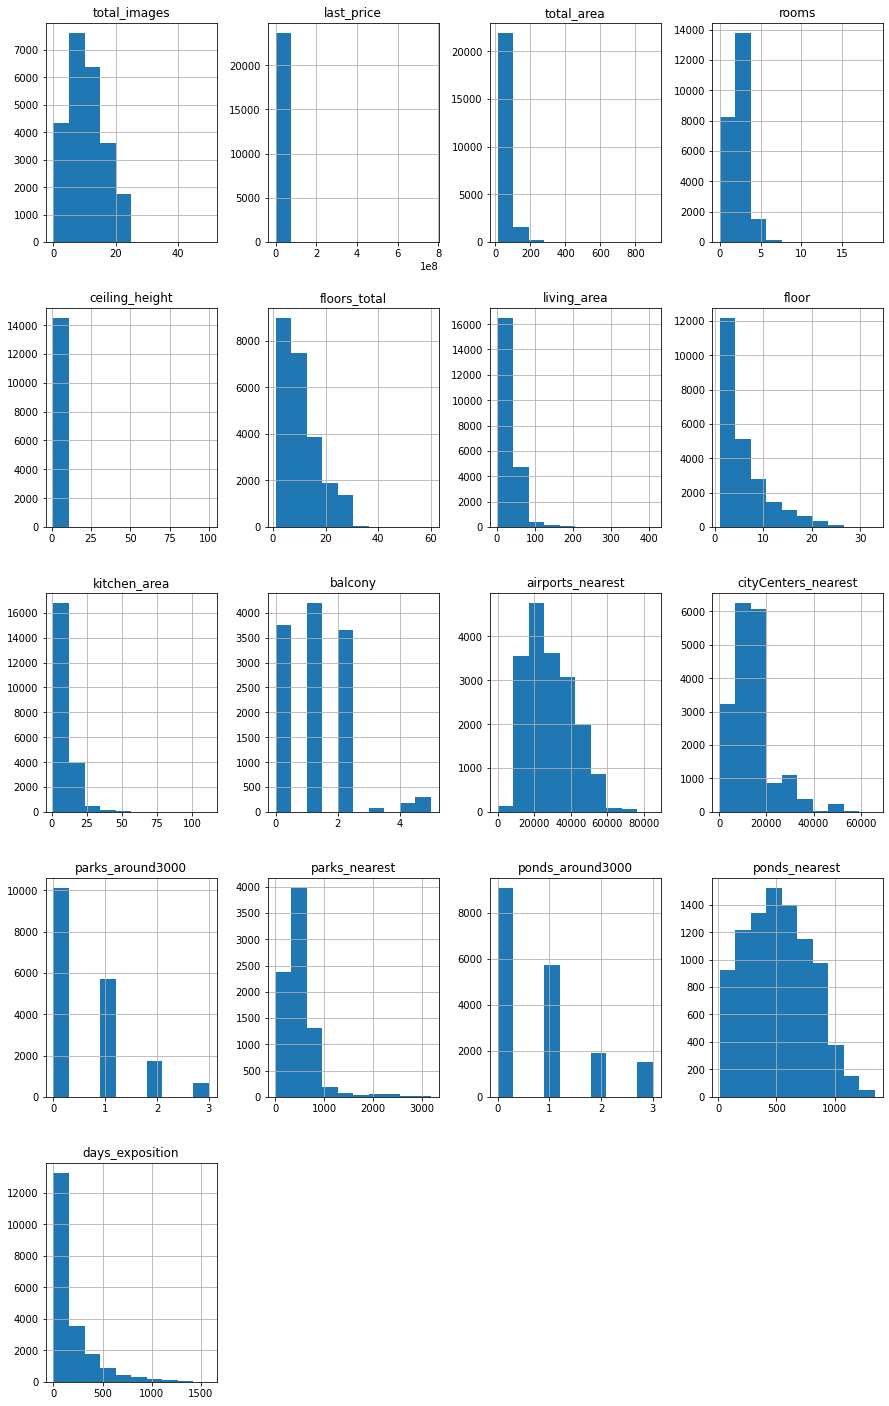

In [ ]:
df.head()
df.info()
df.describe()
df.hist(figsize=(15, 25))
pass

Выведем немного информации о датасете, а также покажем распределение числовых признаков

# Итоги первичного анализа данных

- `rst_day_exposition` - object - должен быть тип datetime
- `ceiling_height` - нулевые значения
- `floors_total` - должен быть тип int, т.к. количество этажей - целое значение + нулевые значения
- `is_apartment` - должен быть тип bool + нулевые значения
- `living_area` - нулевые значения
- `kitchen_area` - нулевые значения
- `balcony` - нулевые значения
- `locality_name` - нулевые значения
- `airports_nearest` - нулевые значения
- `cityCenters_nearest` - нулевые значения
- `parks_around3000` - тип должен быть int + нулевые значения
- `parks_nearest` - нулевые значения
- `ponds_around3000` - тип должен быть int + нулевые значения
- `ponds_nearest` - нулевые значения
- `days_exposition` - тип должен быть int + нулевые значения


## Предобработка данных

### Обработка пропусков

Определим количество пропусков

In [ ]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Необходимо произвести следующие манипуляции:
* В `ceiling_height` заменить пропуски на медианное значение
* В `floors_total` заменить пропуски на столбец floor
* В `living_area` заменить пропуски на медианное значение
* В `is_apartment` заменить пропуски на 0
* В `kitchen_area` заменить пропуски на медианное значение
* В `balcony` заменить пропуски на 0, т.к. это никак не навредит покупателю, он всё равно из объявления не поймёт, есть ли балкон или нет
* В `locality_name` и `airports_nearest` заменить на 0, т.е. аэропорта или центра нет
* В `cityCenters_nearest` оставить пропуск, т.е. если не указано, то недвижимость расположена за пределами города
* В `parks_around3000` заменить на 0, т.е. парки в радиусе 3 км отсутствуют
* В `parks_nearest` заменить пропуски на 0, т.е. парки отсутствуют
* В `ponds_around3000` заменить пропуски на 0, т.е. пруды в радиусе 3 км отсутствуют
* В `ponds_nearest` заменить пропуски на 0, т.е. парки отсутствуют
* В `days_exposition` заменить пропуски на 0, 0 дней


### Переименование столбцов ###

In [ ]:
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest',
                            'parks_around3000':'parks_around_3000',
                            'ponds_around3000':'ponds_around_3000'})
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Заполнение пропусков

Заполнение пропусков проводить не будем, только уберём выбивающиеся значения площади

In [ ]:
df.drop(df[(df.total_area * 0.9 <= (df.living_area + df.kitchen_area))].index, inplace=True)

#### check area

In [ ]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9026
floors_total               85
living_area              1903
floor                       0
is_apartment            20512
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11253
locality_name              49
airports_nearest         5412
city_centers_nearest     5389
parks_around_3000        5388
parks_nearest           15320
ponds_around_3000        5388
ponds_nearest           14297
days_exposition          3102
dtype: int64

In [ ]:
df.is_apartment.unique()

array([nan, False, True], dtype=object)

In [ ]:
df.dropna(subset=['locality_name'], inplace=True)

In [ ]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8991
floors_total               84
living_area              1898
floor                       0
is_apartment            20478
studio                      0
open_plan                   0
kitchen_area             2269
balcony                 11247
locality_name               0
airports_nearest         5404
city_centers_nearest     5381
parks_around_3000        5380
parks_nearest           15286
ponds_around_3000        5380
ponds_nearest           14273
days_exposition          3101
dtype: int64

#### Итоги заполнения пропусков 
* явные пропуски обработаны
* убраны пропуски по `locality_name` их всего 49 - не жалко

### Приведение типов

In [ ]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around_3000       float64
parks_nearest           float64
ponds_around_3000       float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [ ]:
for column in df.columns:
    if column in ['floors_total', 'balcony', 'airport_nearest', 'days_exposition',
                  'parks_around_3000', 'park_nearest', 'ponds_around_3000', 'ponds_nearest', 'last_price', 'ceiling_height']:
        df[column] = df[column].fillna(0)
        df[column] = df[column].astype('int')

    elif column in ['is_apartment']:
        df[column] = df[column].astype('bool')

    elif column in ['first_day_exposition']:
        df[column] = pd.to_datetime(df[column], format='%Y-%m-%dT%H:%M:%S')

    elif column == 'city_centers_nearest':
        df[column] = df[column].fillna(0)
        df[column] = pd.to_numeric(df[column], errors='coerce')

In [ ]:
1- len(df)/23699

0.02211063757964471

In [ ]:
df.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                   int64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000                int64
parks_nearest                  float64
ponds_around_3000                int64
ponds_nearest                    int64
days_exposition                  int64
dtype: object

#### Итоги обработки типов

Изначальные типы не соответствовали логике данных, поэтому были изменены:
* Является ли недвижимость апартаментами - строка
* День выставления объявления - строка
* Многие столбцы с целыми значениями по логике - вещественные

### Предобработка строковых значений

In [ ]:
df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'] = df['locality_name'].str.strip()
df['locality_name'] = df['locality_name'].str.replace('ё','е').str.replace('поселок ', '')
df['locality_name'].sort_values().unique()

array(['александровская', 'алексеевка', 'аннино', 'барышево',
       'белоостров', 'бокситогорск', 'бугры', 'возрождение', 'войсковицы',
       'войскорово', 'володарское', 'волосово', 'волхов', 'всеволожск',
       'выборг', 'высокоключевой', 'высоцк', 'гаврилово', 'гарболово',
       'гатчина', 'гладкое', 'глажево', 'глебычево', 'гончарово',
       'городского типа большая ижора', 'городского типа важины',
       'городского типа вознесенье', 'городского типа вырица',
       'городского типа дружная горка', 'городского типа дубровка',
       'городского типа ефимовский', 'городского типа имени морозова',
       'городского типа имени свердлова', 'городского типа кондратьево',
       'городского типа красный бор', 'городского типа кузнечное',
       'городского типа кузьмоловский', 'городского типа лебяжье',
       'городского типа лесогорский', 'городского типа мга',
       'городского типа назия', 'городского типа никольский',
       'городского типа павлово', 'городского типа прила

In [ ]:
# check
df['locality_name'].nunique()

326

### Обработка дубликатов

In [ ]:
df.duplicated().sum()

0

### Выбивающиеся значения

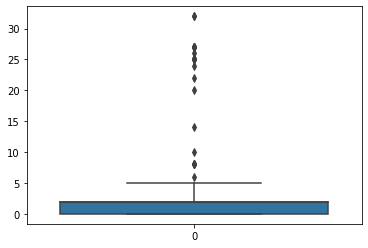

In [ ]:
sns.boxplot(data=df.ceiling_height)

На графике есть значения от 20 до 40, которые явно были написаны с ошибкой в постановке знака запятой, исправим их.\
Ещё нужно убрать всё, что выше 40, так как там есть значение 100

(0.0, 10.0)

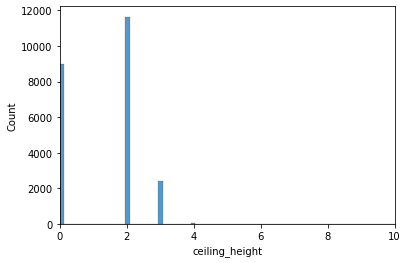

In [ ]:
sns.histplot(df, x='ceiling_height').set_xlim(0, 10)

(0.0, 10.0)

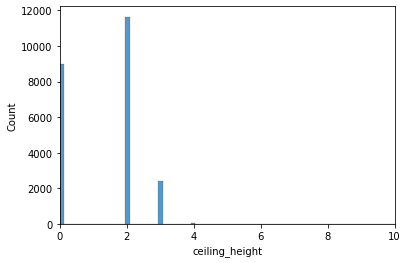

In [ ]:
sns.histplot(df, x='ceiling_height').set_xlim(0, 10)

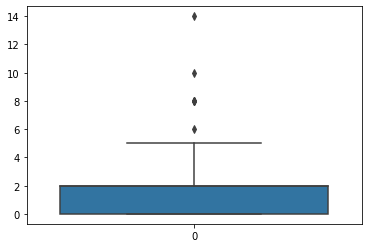

In [ ]:
df = df[(df.ceiling_height < 40) | (df.ceiling_height.isna())]
df['ceiling_height'] = df['ceiling_height'].apply(lambda x: x/10 if x >= 20 else x)
sns.boxplot(data=df.ceiling_height)

In [ ]:
1- len(df)/23699

0.02211063757964471

На графике остались значения выше 7 и ниже 2, это явно выбросы, природа ошибки не ясна, так что просто удалим их.

(1.5, 6.0)

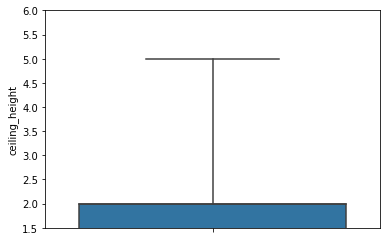

In [ ]:
df = df[(df.ceiling_height < 6) | (df.ceiling_height.isna())]
sns.boxplot(data=df, y='ceiling_height').set_ylim(1.5, 6)

Были убраны все значения, которые по логике не подходят и природа ошибки не ясна, а те значения, в которых запятая стоит не в том месте были приведены к нормальным

In [ ]:
df.max()

total_images                             50
last_price                        763000000
total_area                            900.0
first_day_exposition    2019-05-03 00:00:00
rooms                                    19
ceiling_height                          5.0
floors_total                             60
living_area                           409.7
floor                                    33
is_apartment                           True
studio                                 True
open_plan                              True
kitchen_area                          112.0
balcony                                   5
locality_name                       щеглово
airports_nearest                    84869.0
city_centers_nearest                65968.0
parks_around_3000                         3
parks_nearest                        3190.0
ponds_around_3000                         3
ponds_nearest                          1344
days_exposition                        1580
dtype: object

In [ ]:
1- len(df)/23699

0.022406008692349877

In [ ]:
df.min()

total_images                              0
last_price                            12190
total_area                             12.0
first_day_exposition    2014-11-27 00:00:00
rooms                                     0
ceiling_height                          0.0
floors_total                              0
living_area                             2.0
floor                                     1
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                            1.3
balcony                                   0
locality_name               александровская
airports_nearest                        0.0
city_centers_nearest                    0.0
parks_around_3000                         0
parks_nearest                           1.0
ponds_around_3000                         0
ponds_nearest                             0
days_exposition                           0
dtype: object

Видим необычные значения в столбцах:
* living_area
* kitchen_area

#### check nan

In [ ]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23168 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23168 non-null  int64         
 1   last_price            23168 non-null  int64         
 2   total_area            23168 non-null  float64       
 3   first_day_exposition  23168 non-null  datetime64[ns]
 4   rooms                 23168 non-null  int64         
 5   ceiling_height        23168 non-null  float64       
 6   floors_total          23168 non-null  int64         
 7   living_area           21270 non-null  float64       
 8   floor                 23168 non-null  int64         
 9   is_apartment          23168 non-null  bool          
 10  studio                23168 non-null  bool          
 11  open_plan             23168 non-null  bool          
 12  kitchen_area          20901 non-null  float64       
 13  balcony         

In [ ]:
df = df[(df.living_area > 2) | (df.living_area.isna())]

In [ ]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23166 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23166 non-null  int64         
 1   last_price            23166 non-null  int64         
 2   total_area            23166 non-null  float64       
 3   first_day_exposition  23166 non-null  datetime64[ns]
 4   rooms                 23166 non-null  int64         
 5   ceiling_height        23166 non-null  float64       
 6   floors_total          23166 non-null  int64         
 7   living_area           21268 non-null  float64       
 8   floor                 23166 non-null  int64         
 9   is_apartment          23166 non-null  bool          
 10  studio                23166 non-null  bool          
 11  open_plan             23166 non-null  bool          
 12  kitchen_area          20900 non-null  float64       
 13  balcony         

После редактирования `living_area` убралась аномалия и в `kitchen_area`

#### Итоги обработки выбивающихся значений

Были убраны аномальные значения в полях:
* ceiling_height:
    - Убраны значения выше 60 и ниже 20 и выше 6 и ниже 2
* living_area
    - Убраны значения меньше 5
* kitchen_area

# Итоги предобработки данных
* переименованы столбцы:  
    - cityCenters_nearest теперь city_centers_nearest
    - parks_around3000 теперь parks_around_3000
    - ponds_around3000 теперь ponds_around_3000
* заполнены пропущенные значения:  
    - NaN в 'ceiling_height' теперь 'ceiling_height'.median()
    - NaN в 'living_area' теперь 'living_area'.median()
    - NaN в 'kitchen_area' теперь 'kitchen_area'.median()
    - NaN в 'is_apartment' теперь 0
    - NaN в 'balcony' теперь 0
    - NaN в 'airports_nearest' теперь 0
    - NaN в 'city_centers_nearest' теперь 0
    - NaN в 'parks_around_3000' теперь 0
    - NaN в 'ponds_around_3000' теперь 0
    - NaN в 'parks_nearest' теперь 0
    - NaN в 'ponds_nearest' теперь 0
    - NaN в 'days_exposition' теперь 0
    - NaN в 'floors_total' теперь 'floor'
    - NaN в 'locality_name'.isna() теперь 'санкт-петербург'
* изменены типы данных:  
    - 'floors_total'
    - 'balcony'
    - 'airport_nearest'
    - 'days_exposition'
    - 'city_centers_nearest'
    - 'parks_around_3000'
    - 'park_nearest'
    - 'ponds_around_3000'
    - 'ponds_nearest'
    - 'is_apartment'
    - 'first_day_exposition'
* предобработка строковых данных:  
    - data['locality_name']
    - значения переведены в нижний регистр
    - удалены лишние символы
* обработка дубликатов:
    - не обнаружены

In [ ]:
# check
data = df.copy()

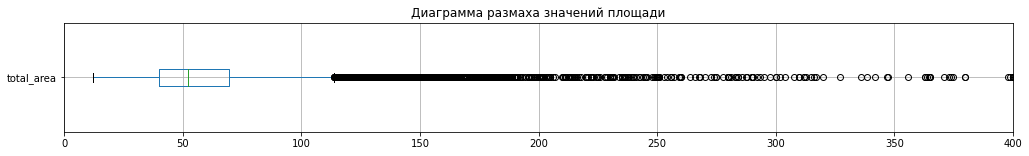

In [ ]:
# check
# для примера горизонтальный вид диаграммы размаха

fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

In [ ]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23166 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23166 non-null  int64         
 1   last_price            23166 non-null  int64         
 2   total_area            23166 non-null  float64       
 3   first_day_exposition  23166 non-null  datetime64[ns]
 4   rooms                 23166 non-null  int64         
 5   ceiling_height        23166 non-null  float64       
 6   floors_total          23166 non-null  int64         
 7   living_area           21268 non-null  float64       
 8   floor                 23166 non-null  int64         
 9   is_apartment          23166 non-null  bool          
 10  studio                23166 non-null  bool          
 11  open_plan             23166 non-null  bool          
 12  kitchen_area          20900 non-null  float64       
 13  balcony         

In [ ]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,166.00","23,166.00","23,166.00","23,166.00","23,166.00","21,268.00","20,900.00","23,166.00","23,166.00"
min,0.00,12.00,0.00,0.00,"12,190.00",3.00,1.30,1.00,0.00
max,19.00,900.00,5.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


In [ ]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,7900
2,7777
3,5653
4,1136
5,316
0,196
6,98
7,59
8,12
9,8


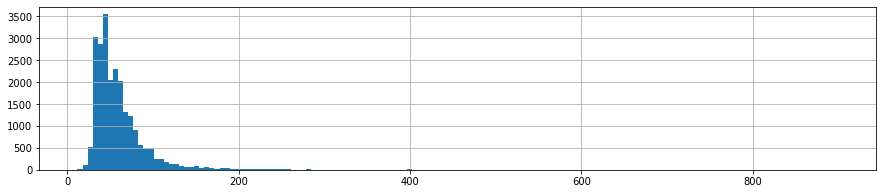

In [ ]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

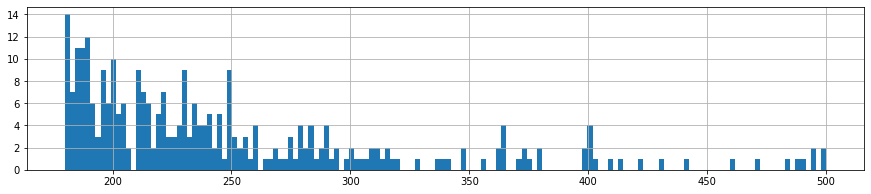

In [ ]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

In [ ]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,20.00,0.00,0.00,"563,990.00",10.00,4.00,1.00,0.00
0.01,1.00,25.50,0.00,0.00,"1,030,000.00",13.00,5.00,1.00,2.00
0.5,2.00,52.00,2.00,74.00,"4,600,000.00",30.00,9.10,4.00,9.00
0.99,5.00,196.00,3.00,"1,046.00","35,369,650.00",116.46,35.00,23.00,26.00
0.9988,8.00,383.64,4.00,"1,361.20","124,585,040.00",213.40,55.41,26.00,34.20


## Уберём аномалии и редкости в этих столбцах 'rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floors_total'

In [ ]:
df = df[(df['total_area'] <= 250) | df.total_area.isna()]

In [ ]:
1- len(df)/23699

0.02700535887590194

На данный момент потери составляют 4%

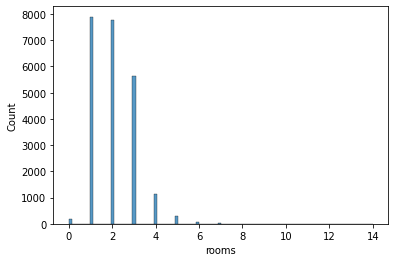

In [ ]:
sns.histplot(data=df, x='rooms')

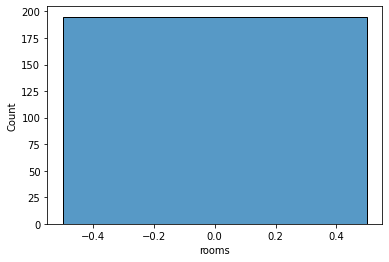

In [ ]:
sns.histplot(data=df[df.rooms < 1] , x='rooms')

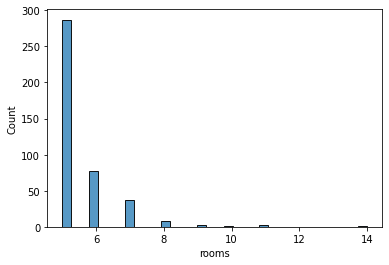

In [ ]:
sns.histplot(data=df[df.rooms > 4], x='rooms')

In [ ]:
df = df[((df.rooms < 7) & (df.rooms > 0)) | (df.rooms.isna())]

In [ ]:
1- len(df)/23699

0.03742773956707035

На данный момент потери составляют 4.8%

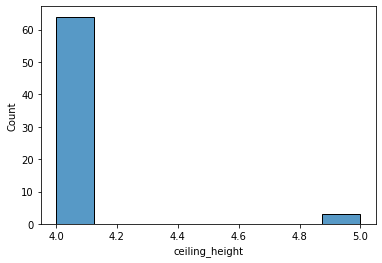

In [ ]:
sns.histplot(data=df[df.ceiling_height > 3.5], x='ceiling_height')

Видим, что после 4 метров, значения редкие, учитвая долю прмерно 20 значений от 23000

In [ ]:
df = df[(df.ceiling_height < 3.5) | (df.ceiling_height.isna())]

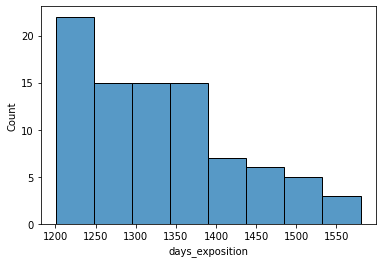

In [ ]:
sns.histplot(data=df[df.days_exposition > 1200], x='days_exposition')

In [ ]:
df = df[(df.days_exposition < 1200) | (df.days_exposition.isna())]

In [ ]:
1- len(df)/23699

0.044010295793071474

На данный момент потери составляют 4.4%

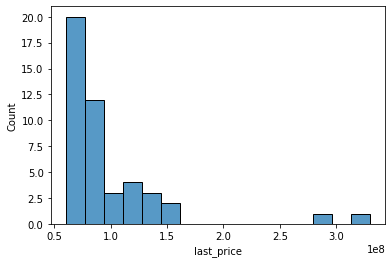

In [ ]:
sns.histplot(data=df[df.last_price > 60000000], x='last_price')

In [ ]:
df = df[(df.last_price <= 60000000) | (df.last_price.isna())]

In [ ]:
1 - len(df)/23699

0.04595130596227692

In [ ]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир

(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,610.00","22,610.00","22,610.00","22,610.00","22,610.00","20,765.00","20,580.00","22,610.00","22,610.00"
min,1.00,12.00,0.00,0.00,"12,190.00",3.00,1.30,1.00,0.00
max,6.00,250.00,3.20,"1,199.00","59,534,892.00",184.00,75.00,33.00,60.00


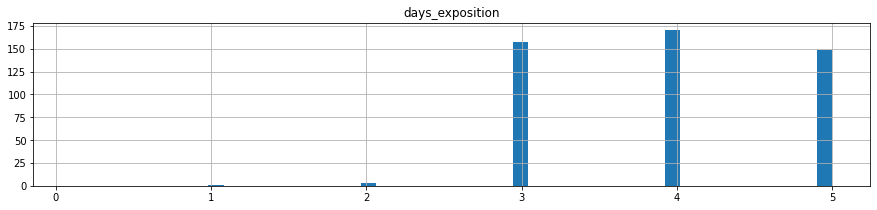

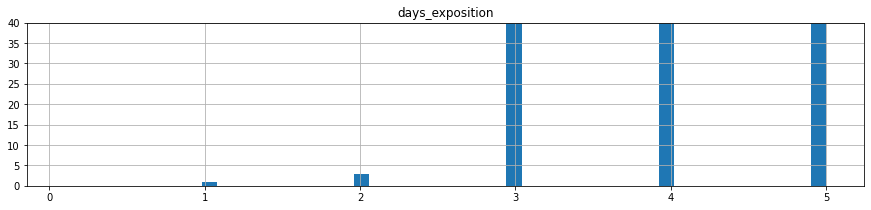

In [ ]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0.1,5));

df.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0.1,5))
plt.ylim(0, 40);

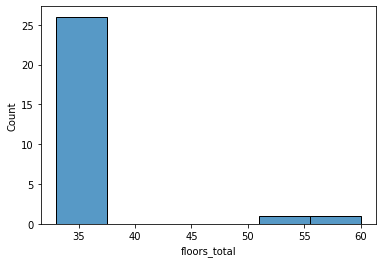

In [ ]:
sns.histplot(df[df.floors_total > 30].floors_total )

In [ ]:
df = df[(df.floors_total < 35) | (df.floors_total.isna())]

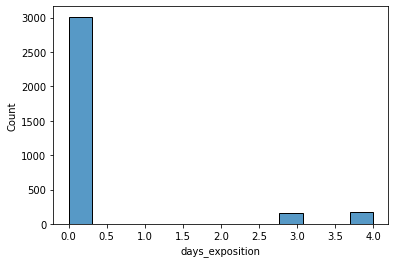

In [ ]:
sns.histplot(df[df.days_exposition < 5].days_exposition)

In [ ]:
1 - len(df)/23699

0.04704839866661037

(0.0, 40.0)

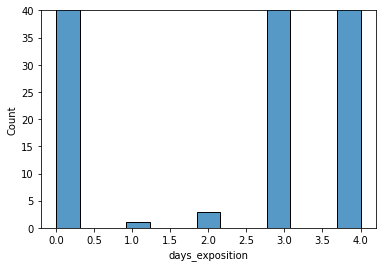

In [ ]:
g = sns.histplot(df[df.days_exposition < 5].days_exposition)
g.set_ylim(0, 40)

In [ ]:
df = df[(df.days_exposition < 1) | (df.days_exposition > 2) | (df.days_exposition.isna())]

In [ ]:
1 - len(df)/23699

0.047217182159584814

In [ ]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир

(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,580.00","22,580.00","22,580.00","22,580.00","22,580.00","20,736.00","20,551.00","22,580.00","22,580.00"
min,1.00,12.00,0.00,0.00,"12,190.00",3.00,1.30,1.00,0.00
max,6.00,250.00,3.20,"1,199.00","59,534,892.00",184.00,75.00,32.00,34.00


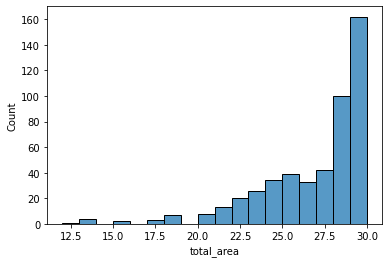

In [ ]:
sns.histplot(data=df[df.total_area < 30], x='total_area')

In [ ]:
df = df[(df.total_area >= 21) | (df.total_area.isna())]

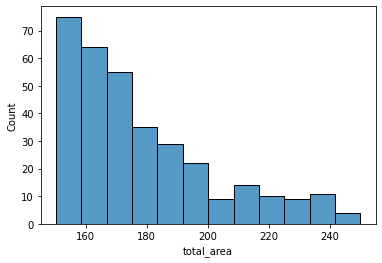

In [ ]:
sns.histplot(data=df[df.total_area > 150], x='total_area')

In [ ]:
df = df[(df.total_area <= 200) | (df.total_area.isna())]

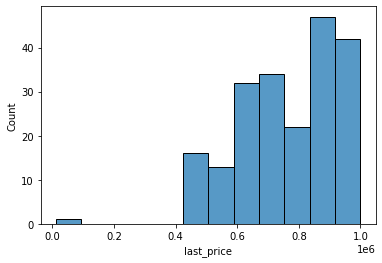

In [ ]:
sns.histplot(data=df[df.last_price < 1000000], x='last_price')

In [ ]:
df = df[(df.last_price >= 600000) | (df.last_price.isna())]

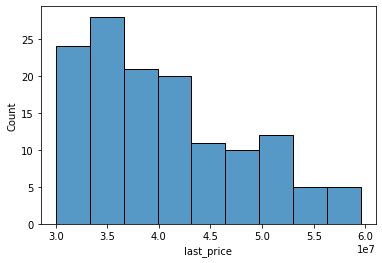

In [ ]:
sns.histplot(data=df[df.last_price > 30000000], x='last_price')

In [ ]:
df = df[(df.last_price < 50000000) | (df.last_price.isna())]

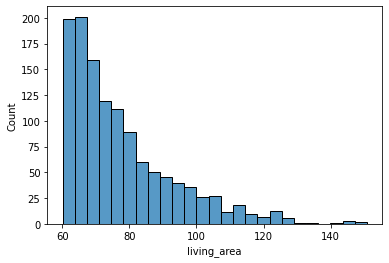

In [ ]:
sns.histplot(data=df[df.living_area > 60], x='living_area')

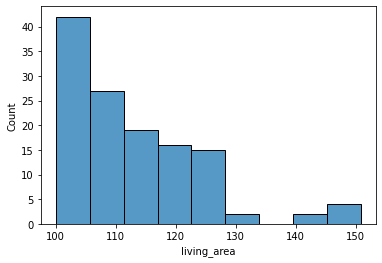

In [ ]:
sns.histplot(data=df[df.living_area > 100], x='living_area')

In [ ]:
df = df[(df.living_area < 130) | (df.living_area.isna())]

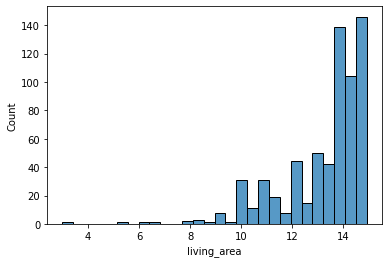

In [ ]:
sns.histplot(data=df[df.living_area < 15], x='living_area')

In [ ]:
df = df[(df.living_area >= 9) | (df.living_area.isna())]

In [ ]:
1 - len(df)/23699

0.05358875901936788

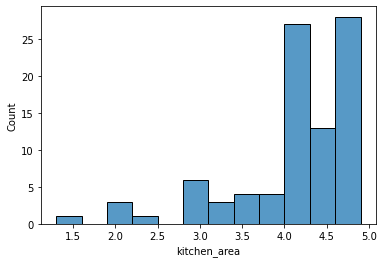

In [ ]:
sns.histplot(data=df[df.kitchen_area < 5], x='kitchen_area')

In [ ]:
df = df[(df.kitchen_area > 4) | (df.kitchen_area.isna())]

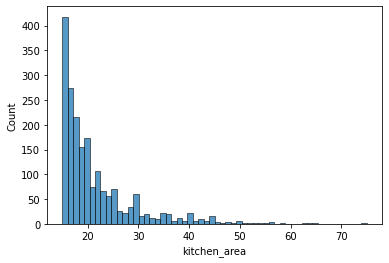

In [ ]:
sns.histplot(data=df[df.kitchen_area > 15], x='kitchen_area')

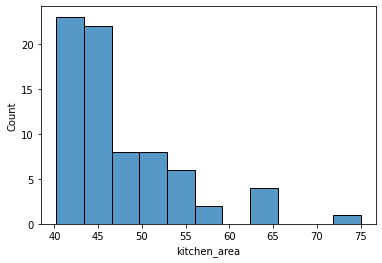

In [ ]:
sns.histplot(data=df[df.kitchen_area > 40], x='kitchen_area')

In [ ]:
df = df[(df.kitchen_area <= 45) | (df.kitchen_area.isna())]

In [ ]:
1 - len(df)/23699

0.05675344951263761

## Посчитайте и добавьте в таблицу новые столбцы

### Посчитать и добавить в таблицу столбец с  расчётом данных о стоимости одного метра

In [ ]:
df['square_meter_price'] =(df['last_price']/df['total_area']).round()
df['square_meter_price']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        120370.0
1         82921.0
2         92786.0
4        100000.0
5         95066.0
           ...   
23694     72491.0
23695     52542.0
23696     44092.0
23697    149511.0
23698     41796.0
Name: square_meter_price, Length: 22354, dtype: float64

### Посчитать и добавить в таблицу столбец с днем недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [ ]:
df['first_day_exposition'] = df['first_day_exposition'].dt.date
df['first_day_exposition'] = df['first_day_exposition'].astype('datetime64[M]')

df['day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,day,month,year
0,20,13000000,108.0,2019-03-01,3,2.0,16,51.0,8,True,...,16028.0,1,482.0,2,755,0,120370.0,4,3,2019
1,7,3350000,40.4,2018-12-01,1,0.0,11,18.6,1,True,...,18603.0,0,NaN,0,0,81,82921.0,5,12,2018
2,10,5196000,56.0,2015-08-01,2,0.0,5,34.3,4,True,...,13933.0,1,90.0,2,574,558,92786.0,5,8,2015
4,2,10000000,100.0,2018-06-01,2,3.0,14,32.0,13,True,...,8098.0,2,112.0,1,48,121,100000.0,4,6,2018
5,10,2890000,30.4,2018-09-01,1,0.0,12,14.4,5,True,...,0.0,0,NaN,0,0,55,95066.0,5,9,2018


### Посчитать и добавить в таблицу столбец с типом этажа квартиры (значения — «‎первый», «последний», «другой»);

In [ ]:
def my(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] != 1 and row['floors_total'] == row['floor']:
        return 'последний'
    return 'другой'

df['floor_type'] = df.apply(lambda x: my(x), axis=1)
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,day,month,year,floor_type
0,20,13000000,108.00,2019-03-01,3,2.0,16,51.0,8,True,...,1,482.0,2,755,0,120370.0,4,3,2019,другой
1,7,3350000,40.40,2018-12-01,1,0.0,11,18.6,1,True,...,0,NaN,0,0,81,82921.0,5,12,2018,первый
2,10,5196000,56.00,2015-08-01,2,0.0,5,34.3,4,True,...,1,90.0,2,574,558,92786.0,5,8,2015,другой
4,2,10000000,100.00,2018-06-01,2,3.0,14,32.0,13,True,...,2,112.0,1,48,121,100000.0,4,6,2018,другой
5,10,2890000,30.40,2018-09-01,1,0.0,12,14.4,5,True,...,0,NaN,0,0,55,95066.0,5,9,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-01,3,3.0,5,73.3,3,True,...,1,796.0,3,381,0,72491.0,2,3,2017,другой
23695,14,3100000,59.00,2018-01-01,3,0.0,5,38.0,4,True,...,0,NaN,0,0,45,52542.0,0,1,2018,другой
23696,18,2500000,56.70,2018-02-01,2,0.0,3,29.7,1,True,...,0,NaN,0,0,0,44092.0,3,2,2018,первый
23697,13,11475000,76.75,2017-03-01,2,3.0,17,NaN,12,True,...,2,173.0,3,196,602,149511.0,2,3,2017,другой


### Посчитать и добавить в таблицу столбец с расстоянием до центра города в километрах (переведите из м в км и округлите до целых значений).

In [ ]:
df['city_centers_nearest_km'] = df['city_centers_nearest'].apply(lambda x: x/1000).apply(np.ceil).astype('int')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,day,month,year,floor_type,city_centers_nearest_km
0,20,13000000,108.00,2019-03-01,3,2.0,16,51.0,8,True,...,482.0,2,755,0,120370.0,4,3,2019,другой,17
1,7,3350000,40.40,2018-12-01,1,0.0,11,18.6,1,True,...,NaN,0,0,81,82921.0,5,12,2018,первый,19
2,10,5196000,56.00,2015-08-01,2,0.0,5,34.3,4,True,...,90.0,2,574,558,92786.0,5,8,2015,другой,14
4,2,10000000,100.00,2018-06-01,2,3.0,14,32.0,13,True,...,112.0,1,48,121,100000.0,4,6,2018,другой,9
5,10,2890000,30.40,2018-09-01,1,0.0,12,14.4,5,True,...,NaN,0,0,55,95066.0,5,9,2018,другой,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-01,3,3.0,5,73.3,3,True,...,796.0,3,381,0,72491.0,2,3,2017,другой,5
23695,14,3100000,59.00,2018-01-01,3,0.0,5,38.0,4,True,...,NaN,0,0,45,52542.0,0,1,2018,другой,0
23696,18,2500000,56.70,2018-02-01,2,0.0,3,29.7,1,True,...,NaN,0,0,0,44092.0,3,2,2018,первый,0
23697,13,11475000,76.75,2017-03-01,2,3.0,17,NaN,12,True,...,173.0,3,196,602,149511.0,2,3,2017,другой,11


### Итоги добавления столбцов в таблицу 
Получили готовый к обработке сет данных с дополнительными параметрами. теперь поробуем провести анализ и ответим на поставленные вопросы.


## Проведите исследовательский анализ данных

In [ ]:
df[['total_area','living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'floor_type','floors_total', 'city_centers_nearest', 'airports_nearest', 'parks_nearest', 'day', 'month']].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,city_centers_nearest,airports_nearest,parks_nearest,day,month
count,22354.000000,20540.000000,20363.000000,2.235400e+04,22354.000000,22354.000000,22354.000000,22354.000000,22354.000000,17107.000000,7520.000000,22354.000000,22354.000000
mean,57.805943,32.796911,10.170972,5.795002e+06,2.035833,1.323504,5.898094,10.667934,11056.773195,28935.385339,493.017154,3.043124,6.394471
std,25.292387,16.484936,4.683030,4.406814e+06,0.958549,1.092885,4.854791,6.531528,9685.750565,12747.506058,343.568711,1.918605,3.486767
min,21.100000,9.000000,4.100000,6.000000e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,40.000000,18.500000,7.000000,3.450000e+06,1.000000,0.000000,2.000000,5.000000,2370.250000,18450.500000,288.000000,2.000000,3.000000
50%,51.800000,30.000000,9.000000,4.600000e+06,2.000000,2.000000,4.000000,9.000000,11477.000000,27047.000000,456.000000,3.000000,6.000000
75%,68.000000,41.900000,11.635000,6.600000e+06,3.000000,2.000000,8.000000,16.000000,15364.750000,37434.000000,614.000000,4.000000,10.000000
max,200.000000,127.000000,45.000000,4.990000e+07,6.000000,3.200000,32.000000,34.000000,65968.000000,84869.000000,3190.000000,6.000000,12.000000


### Описание параметров

In [ ]:
print('Медиана общей площади составляет: ', df['total_area'].median())
print('Медиана жилой площади составляет: ', df['living_area'].median())
print('Медиана площади кухни составляет: ', df['kitchen_area'].median())
print('Медиана цены составляет: ', df['last_price'].median())
print('Медиана комнат составляет: ', df['rooms'].median())
print('Медиана высота потолков составляет: ', df['ceiling_height'].median())
print('Медиана этажей потолков составляет: ', df['floor'].median())
print('Медиана общего количества этажей в доме составляет: ', df['floors_total'].median())
print('Медиана расстояния до центра города в метрах составляет: ', df['city_centers_nearest'].median())
print('Медиана расстояния до ближайшего аэропорта в метрах составляет: ', df['airports_nearest'].median())
print('Медиана дня и месяца публикации объявления составляет: ', df['first_day_exposition'].median())

Медиана общей площади составляет:  51.8
Медиана жилой площади составляет:  30.0
Медиана площади кухни составляет:  9.0
Медиана цены составляет:  4600000.0
Медиана комнат составляет:  2.0
Медиана высота потолков составляет:  2.0
Медиана этажей потолков составляет:  4.0
Медиана общего количества этажей в доме составляет:  9.0
Медиана расстояния до центра города в метрах составляет:  11477.0
Медиана расстояния до ближайшего аэропорта в метрах составляет:  27047.0
Медиана дня и месяца публикации объявления составляет:  2017-12-01 00:00:00


Сделаем функцию для вывода графиков

#### Изучим параметр: общая площадь квартиры

[(0.0, 150.0)]

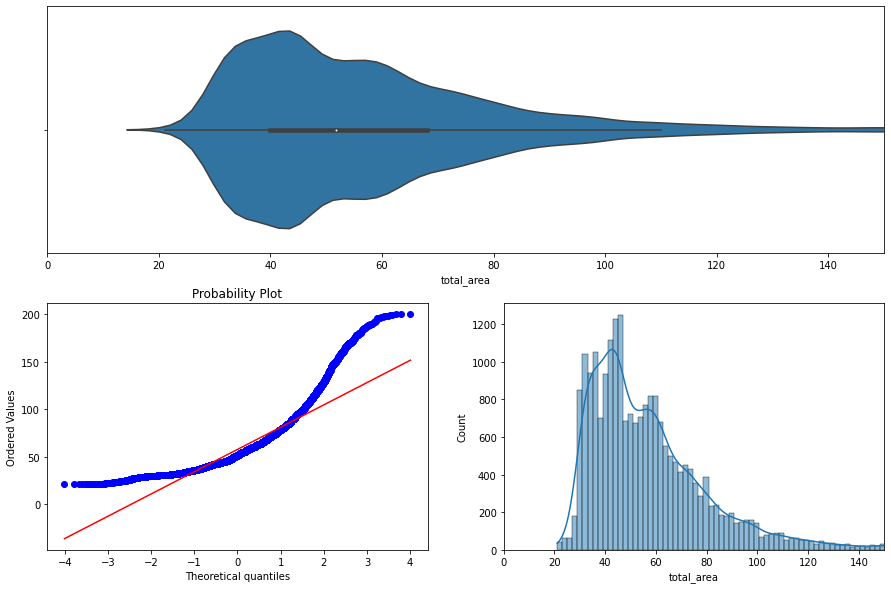

In [ ]:
dataG = df[df['total_area'] > 0]
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=dataG['total_area'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 150))
stats.probplot(dataG['total_area'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=dataG['total_area'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 150))

Видим, экспоненциальное распределение, возможно стоит разделять все графики по количеству комнат

[(0.0, 150.0)]

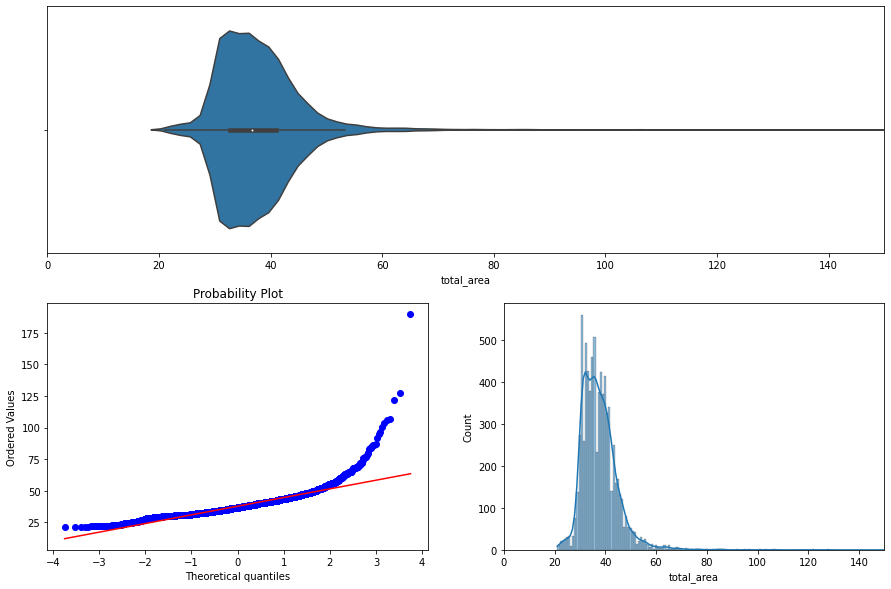

In [ ]:
dataG = df[(df['total_area'] > 0) & (df['rooms'] == 1)]
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=dataG['total_area'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 150))
stats.probplot(dataG['total_area'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=dataG['total_area'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 150))

Видим нормальное распределение, плюс квантили графика размаха соответствуют логике, площадь однокомнатных квартир действительно варьируется примерно от 25 до 50

[(0.0, 150.0)]

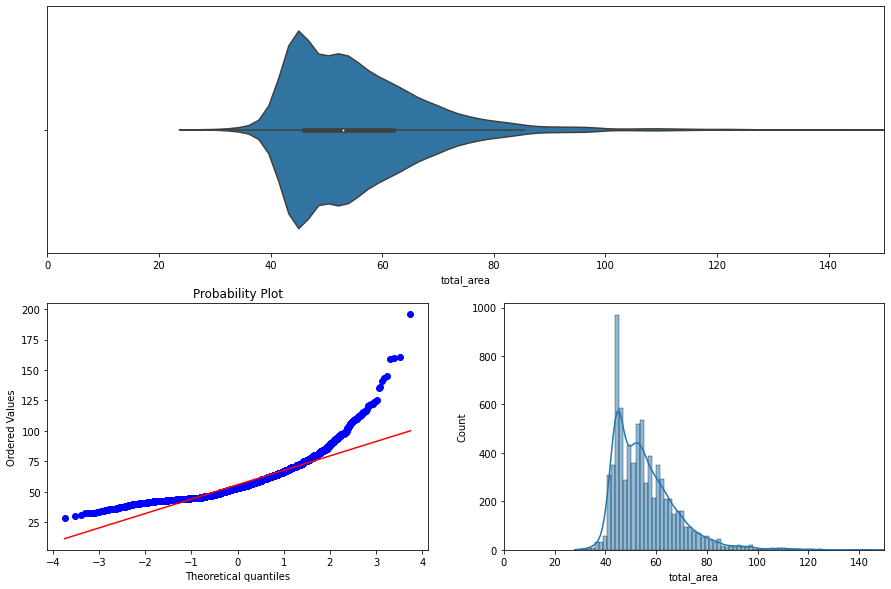

In [ ]:
dataG = df[(df['total_area'] > 0) & (df['rooms'] == 2)]
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=dataG['total_area'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 150))
stats.probplot(dataG['total_area'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=dataG['total_area'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 150))

Здесь ситуация похуже, можно видеть сильно отклоняющееся от нормального распределение, однако бокс плот всё же читабелен, так что можно сказать, что нормальные значения для двухкомнатных квартир это примерно от 35 до 85 кв. метров

[(0.0, 150.0)]

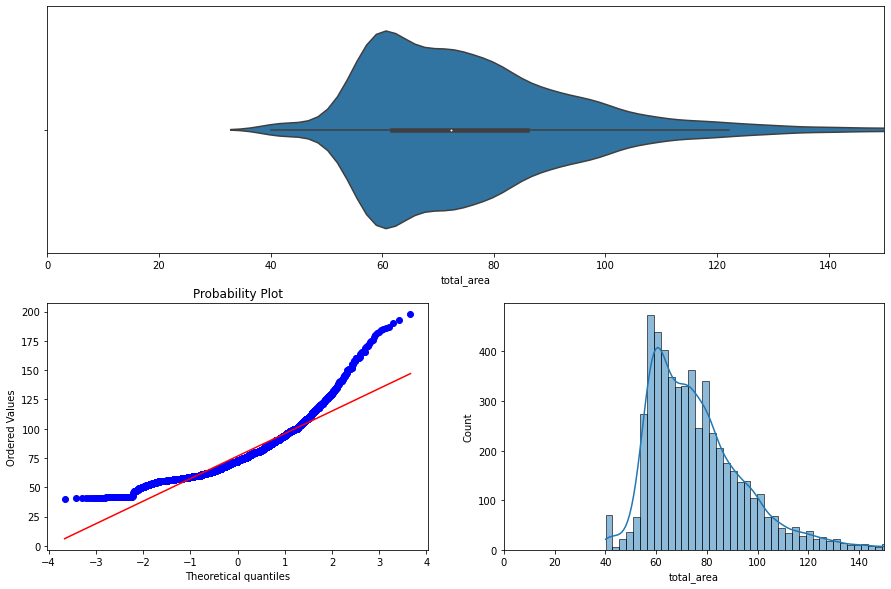

In [ ]:
dataG = df[(df['total_area'] > 0) & (df['rooms'] == 3)]
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=dataG['total_area'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 150))
stats.probplot(dataG['total_area'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=dataG['total_area'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 150))

Для трёхкомнатных боксплот также читаем, видим, что нормальная площадь этих квартир находится в пределах от 40 до 110, что вполне реально

#### Изучим параметр: жилая площадь квартиры

[(0.0, 80.0)]

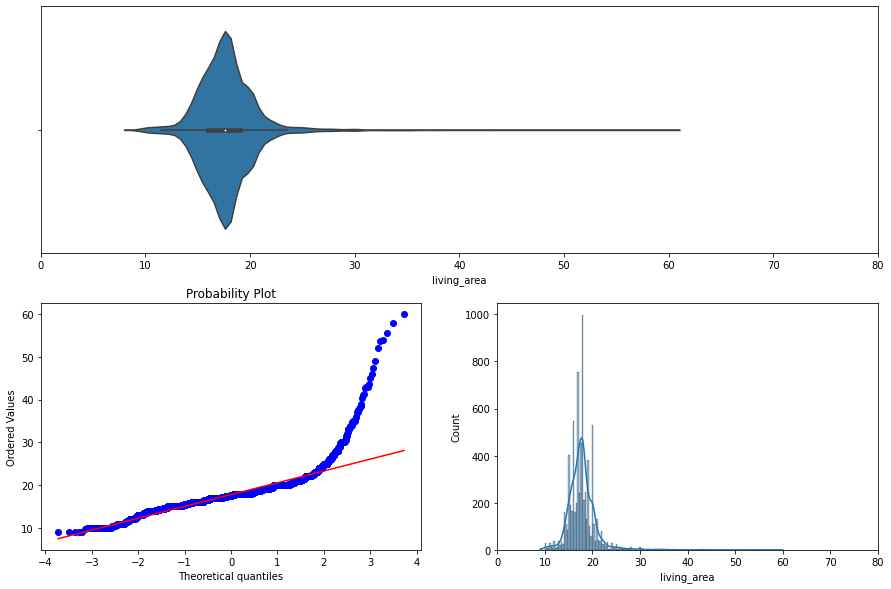

In [ ]:
dataG = df[(df['living_area'] > 0) & (df['rooms'] == 1)]
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=dataG['living_area'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 80))
stats.probplot(dataG['living_area'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=dataG['living_area'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 80))

Жилая площадь однокомнатных квартир имеет нормальное распределение до какого-то момента, затем мы видим всплеск 30 кв. метров жилой площади, вероятно это связано с каким-то стандартом планировки, но это значение не портит наш бокс плот, так что видим, что в основном размер жилой площади в однокомнатной квартире составляет от 10 до 23 кв. метров

[(0.0, 80.0)]

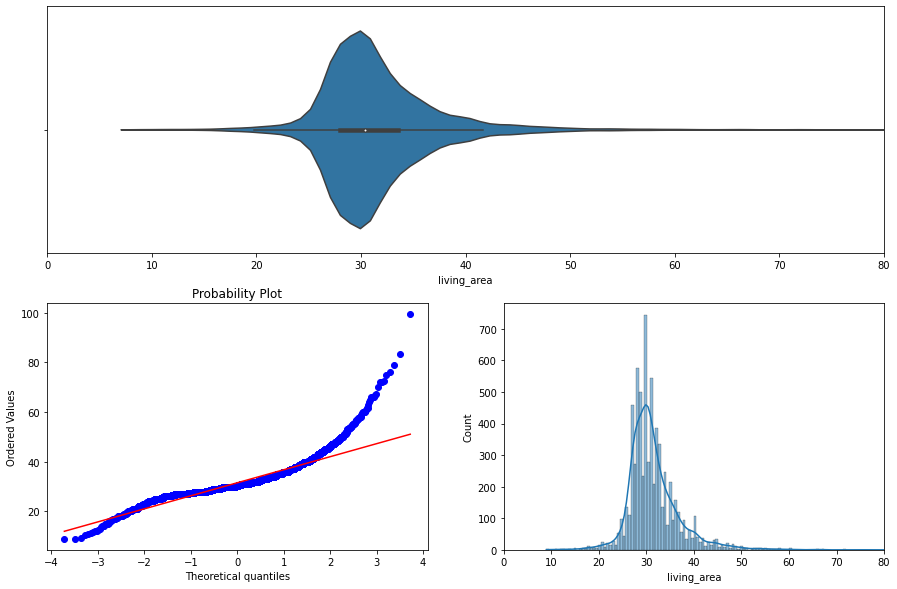

In [ ]:
dataG = df[(df['living_area'] > 0) & (df['rooms'] == 2)]
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=dataG['living_area'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 80))
stats.probplot(dataG['living_area'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=dataG['living_area'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 80))

Двухкомнатные имеют жилую площадь от 25 до 40 кв. метров

[(0.0, 80.0)]

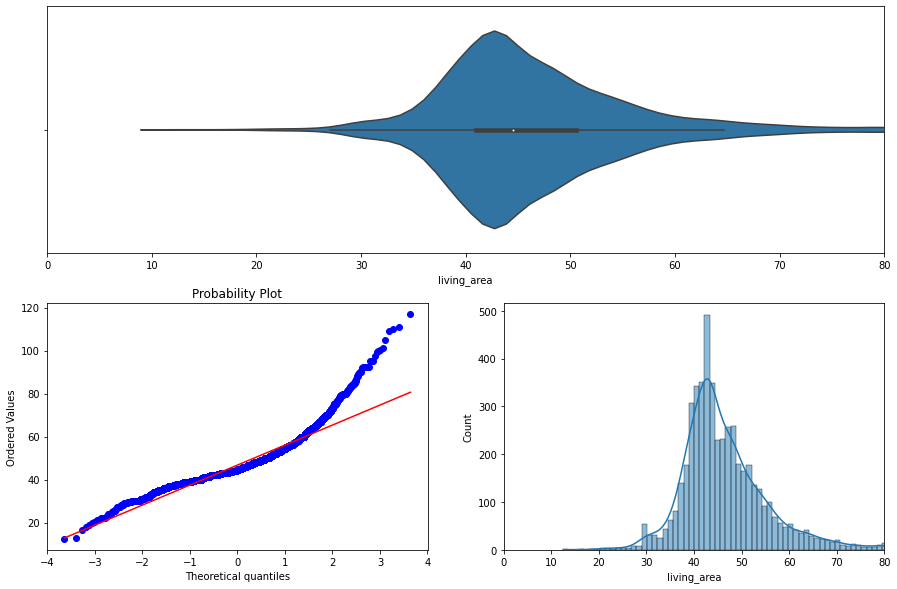

In [ ]:
dataG = df[(df['living_area'] > 0) & (df['rooms'] == 3)]
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=dataG['living_area'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 80))
stats.probplot(dataG['living_area'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=dataG['living_area'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 80))

Странно, трёхкомнатные квартиры тоже имеют всплеск в 30 кв. метрах по жилой площади, но в целом такое может быть, по 10 кв. метров на комнату вполне логично, ну а нормальные значения, которые имеют строки из 50% выборки: от 38 до 55

[(0.0, 150.0)]

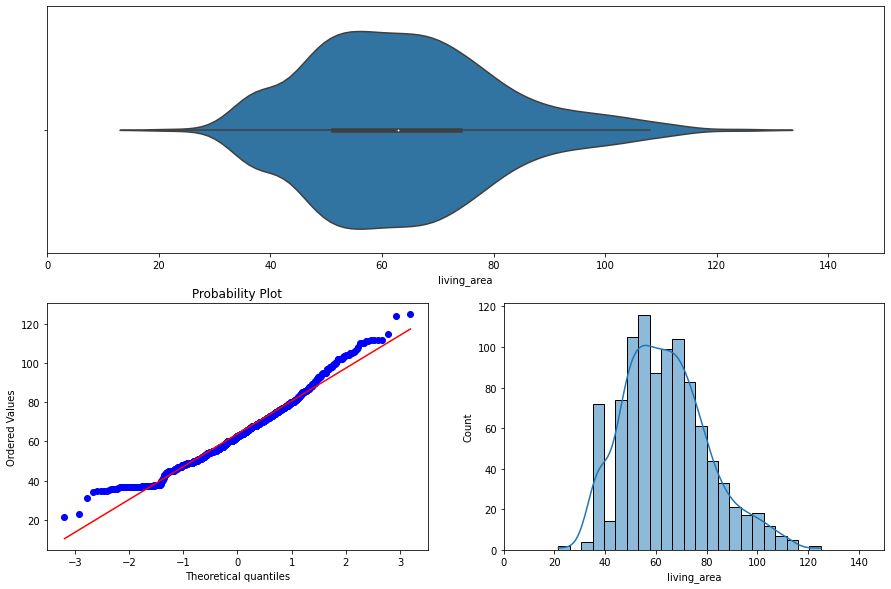

In [ ]:
dataG = df[(df['living_area'] > 0) & (df['rooms'] == 4)]
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=dataG['living_area'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 150))
stats.probplot(dataG['living_area'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=dataG['living_area'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 150))

Четырёхкомнатные от 22 до 85, что очень странно, 22 метра для четырёхкомнатной квартиры - явно аномалия стоит обратить внимание на это внимание, природа аномалии может быть такова, что living может трактоваться ещё и как гостиная living_room, а она может быть 22 метра в четырёхкомнатной квартире

Средние значения:
* У двухкомнатных средняя жилая площадь 26 кв м
* У трёхкомнатных средняя жилая площадь 40 кв м
* У Четырёхкомнатных средняя жилая площадь 46 кв м

#### Изучим параметр: площадь кухни

[(0.0, 40.0)]

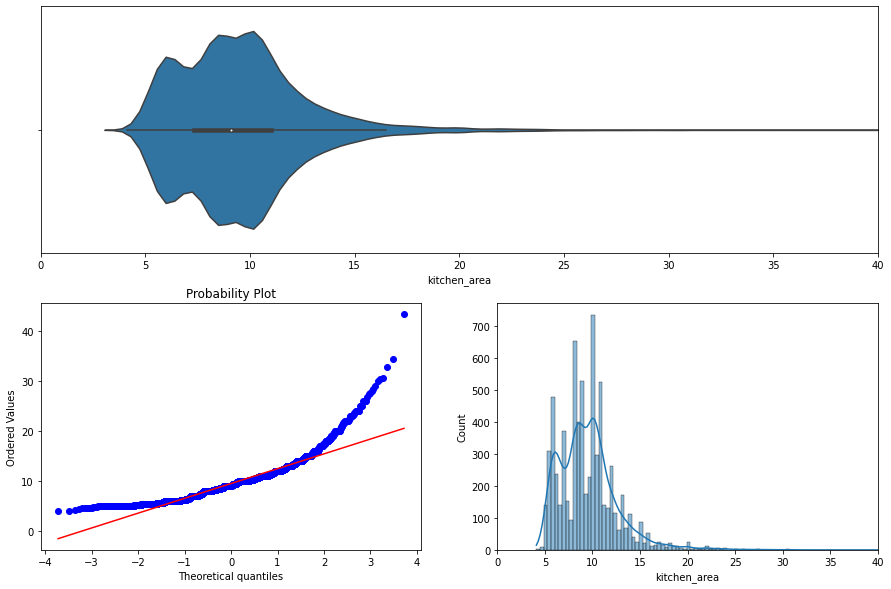

In [ ]:
dataG = df[(df['kitchen_area'] > 0) & (df['rooms'] == 1)]
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=dataG['kitchen_area'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 40))
stats.probplot(dataG['kitchen_area'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=dataG['kitchen_area'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 40))

[(0.0, 40.0)]

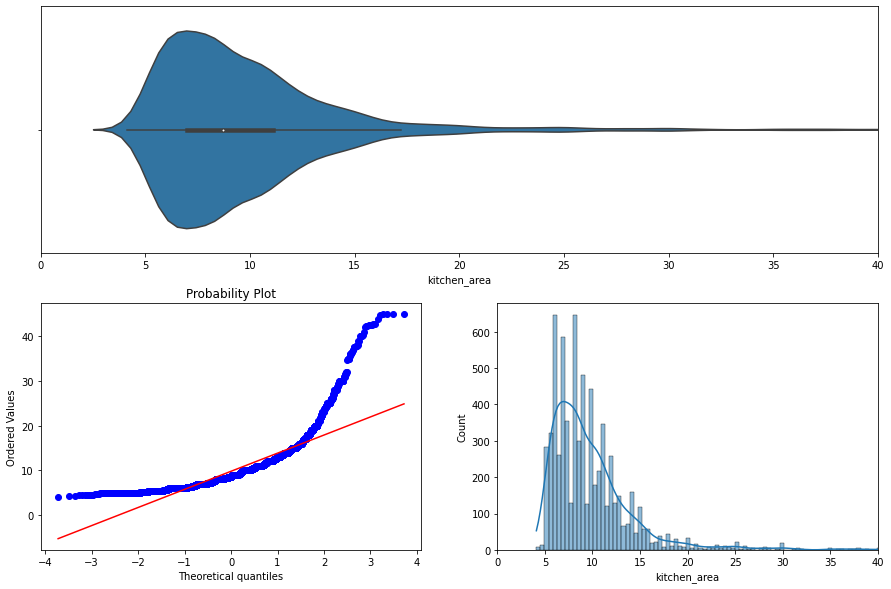

In [ ]:
dataG = df[(df['kitchen_area'] > 0) & (df['rooms'] == 2)]
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=dataG['kitchen_area'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 40))
stats.probplot(dataG['kitchen_area'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=dataG['kitchen_area'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 40))

[(0.0, 40.0)]

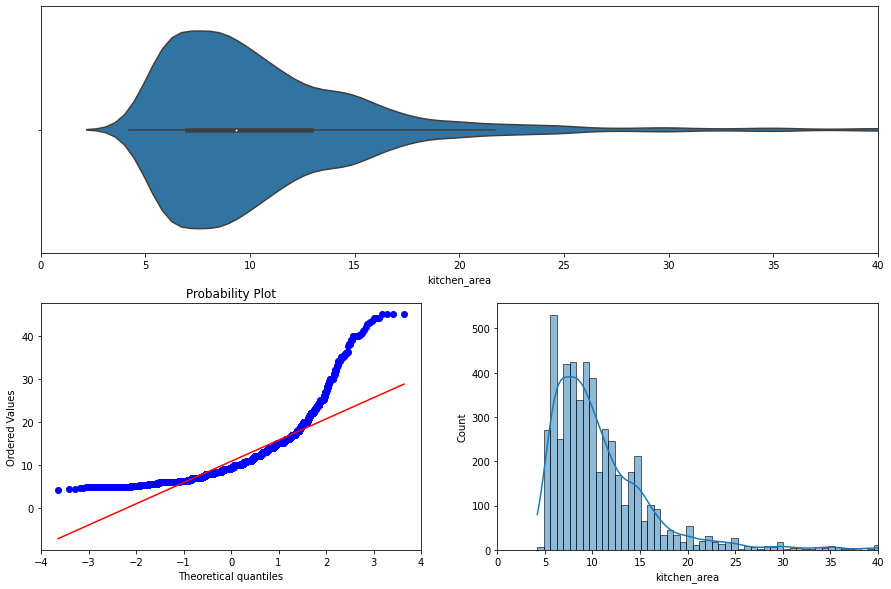

In [ ]:
dataG = df[(df['kitchen_area'] > 0) & (df['rooms'] == 3)]
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=dataG['kitchen_area'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 40))
stats.probplot(dataG['kitchen_area'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=dataG['kitchen_area'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 40))

[(0.0, 40.0)]

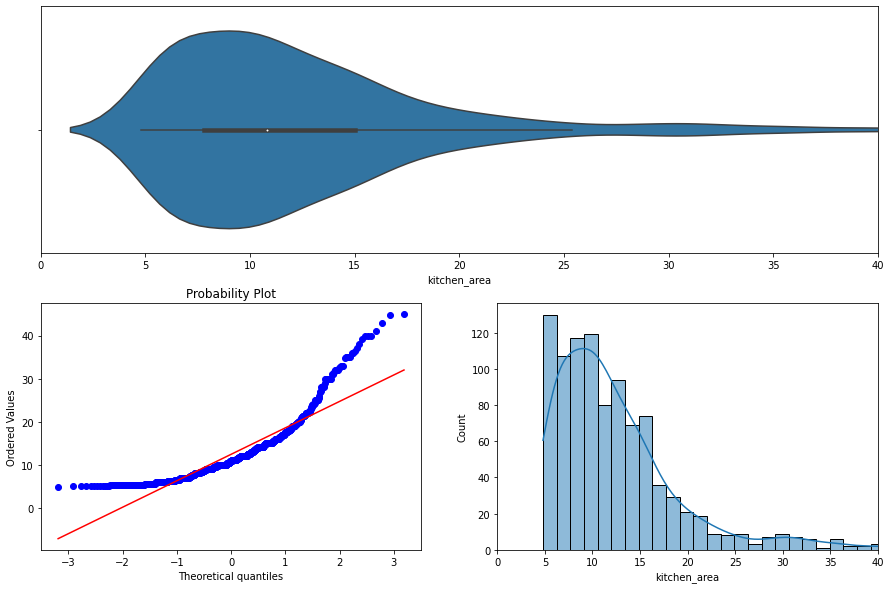

In [ ]:
dataG = df[(df['kitchen_area'] > 0) & (df['rooms'] == 4)]
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=dataG['kitchen_area'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 40))
stats.probplot(dataG['kitchen_area'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=dataG['kitchen_area'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 40))

Площадь по кухням в основной массе:
* От 5 до 13 для однокомнатных
* От 4 до 15 для двухкомнатных ясно почему меньше
* От 4 до 18 для трёхкомнатных
* От 3 до 23 для четырёхкомнатных

#### Изучим параметр: цена

[(0.0, 10000000.0)]

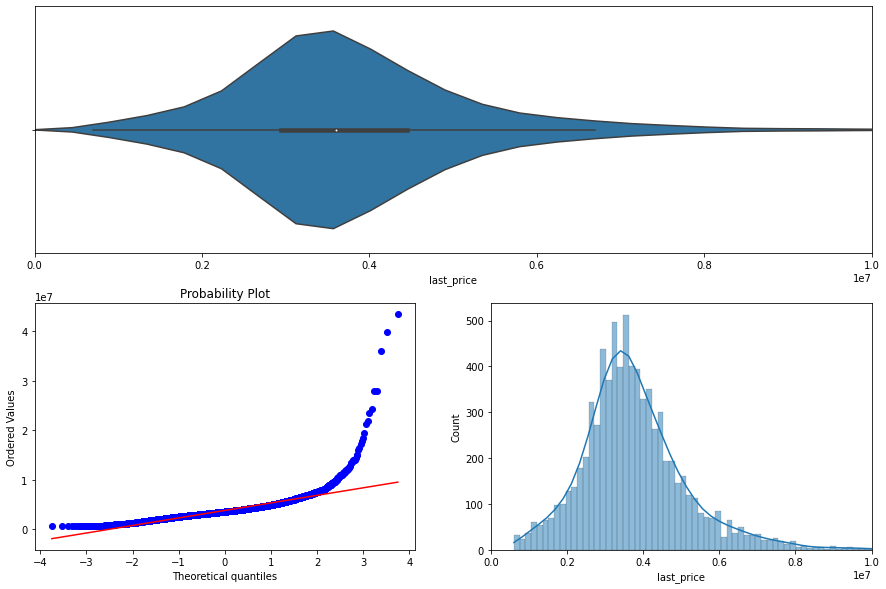

In [ ]:
dataG = df[(df['last_price'] > 0) & (df['rooms'] == 1)]
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=dataG['last_price'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 10000000))
stats.probplot(dataG['last_price'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=dataG['last_price'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 10000000))

[(0.0, 15000000.0)]

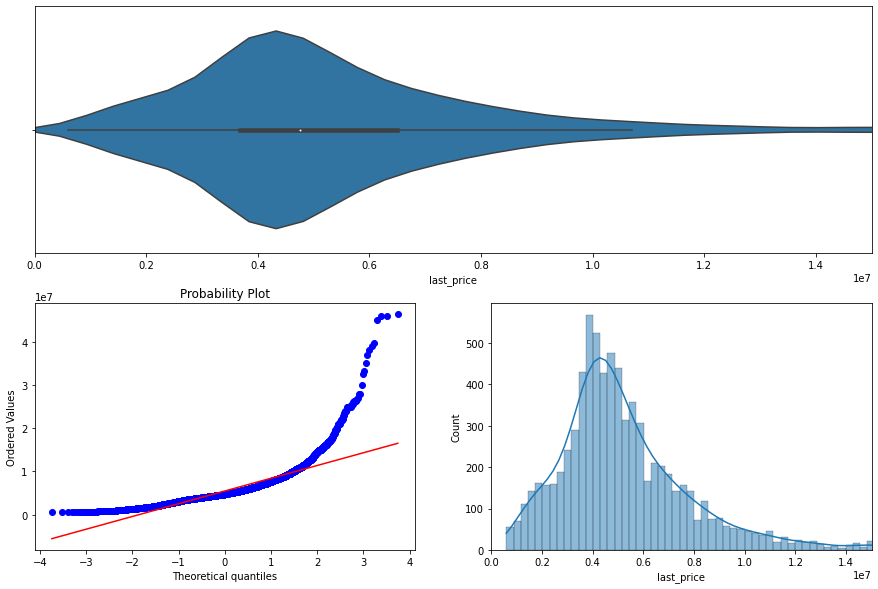

In [ ]:
dataG = df[(df['last_price'] > 0) & (df['rooms'] == 2)]
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=dataG['last_price'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 15000000))
stats.probplot(dataG['last_price'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=dataG['last_price'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 15000000))

[(0.0, 20000000.0)]

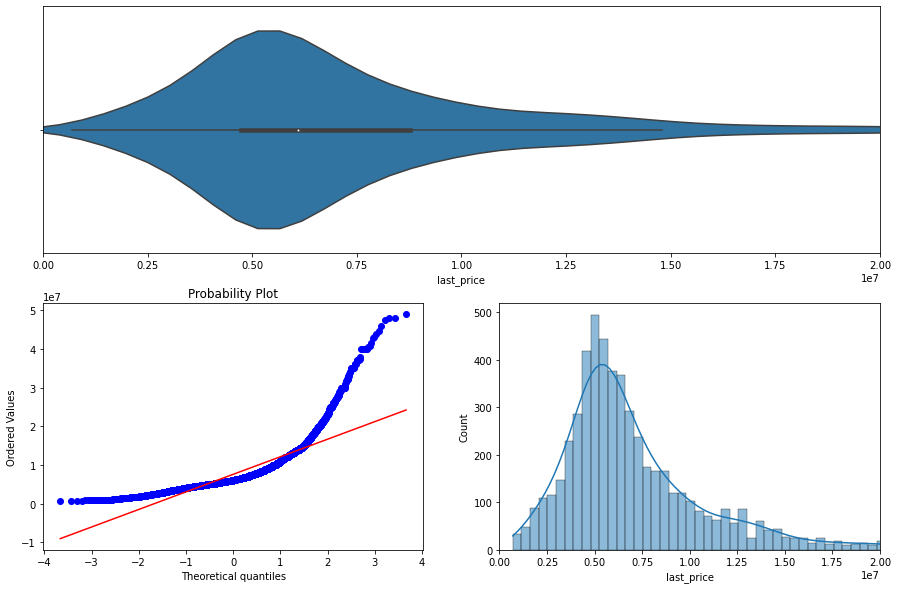

In [ ]:
dataG = df[(df['last_price'] > 0) & (df['rooms'] == 3)]
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=dataG['last_price'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 20000000))
stats.probplot(dataG['last_price'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=dataG['last_price'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 20000000))

[(0.0, 25000000.0)]

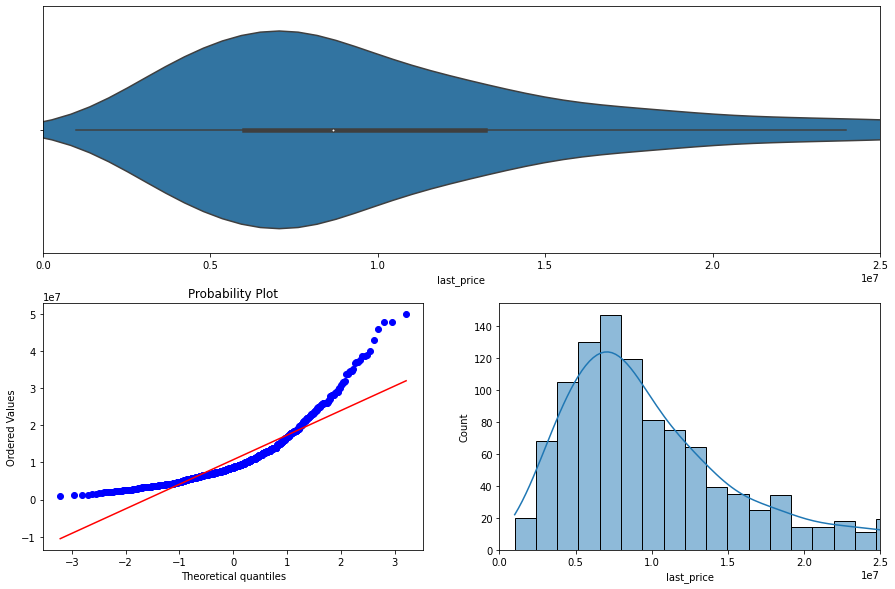

In [ ]:
dataG = df[(df['last_price'] > 0) & (df['rooms'] == 4)]
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

sns.violinplot(x=dataG['last_price'], ax=plt.subplot(gs[0, 0:])).set(xlim=(0, 25000000))
stats.probplot(dataG['last_price'], dist="norm", plot=plt.subplot(gs[1, 0]))

sns.histplot(x=dataG['last_price'], kde=True, ax=plt.subplot(gs[1, 1])).set(xlim=(0, 25000000))

Видим, что цена:
* Для основной части однокомнатных квартир варьируется от 1,500,000 до 6,700,000
* Для основной части двухкомнатных квартир варьируется от 1,800,000 до 9,800,000
* Для основной части трёхкомнатных квартир варьируется от 2,500,000 до 13,000,000
* Для основной части четырёхкомнатных квартир варьируется от 4,850,000 до 17,000,000

#### Изучим все остальные параметры из списка

In [ ]:
bins = {'rooms': 6, 'ceiling_height': 6, 'floor': 15, 'floors_total': 35, 'city_centers_nearest': 35000, 'airports_nearest': 50000, 'parks_nearest': 1000, 'day': 7, 'month': 13}
print(*bins.keys(), sep='\n')

rooms
ceiling_height
floor
floors_total
city_centers_nearest
airports_nearest
parks_nearest
day
month


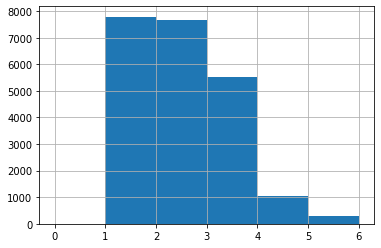

In [ ]:
df.rooms.hist(bins=bins['rooms'], range=(0, bins['rooms']))

Видим, что в основном продаются квартиры от 1 до 4 комнат

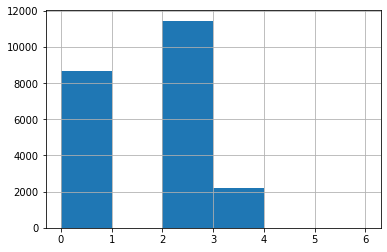

In [ ]:
df.ceiling_height.hist(bins=bins['ceiling_height'], range=(0, bins['ceiling_height']))

Метраж потолков от 2 до 4, что тоже логично и отражает характеристики большинства объявлений

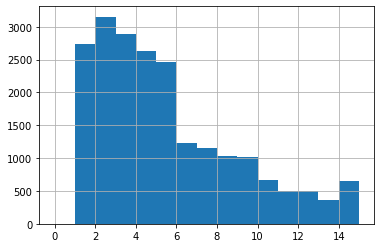

In [ ]:
df.floor.hist(bins=bins['floor'], range=(0, bins['floor']))

В большинстве объявлений квартиры на нижних этажах до 6, вероятно, потому что они дешевле

In [ ]:
px.histogram(df, x='floors_total', nbins=len(df.floors_total)*2)

Как мы видим, в основном продаются квартиры в домах 5 и 9 этажей, вероятно потому что раньше строили пятиэтажки и девятиэтажки, сейчас их продают

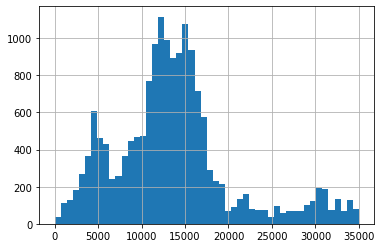

In [ ]:
df[df.city_centers_nearest > 0].city_centers_nearest.hist(bins=50, range=(0, bins['city_centers_nearest']))

Тут видим два скопления:
* Те квартиры для которых центр в районе 5 км
* Те, для которых в районе 15 км

Интересная особенность, ведь ближе к центру квартиры дороже.

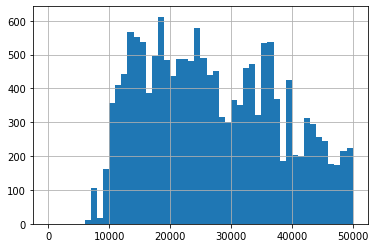

In [ ]:
df[df.airports_nearest > 0].airports_nearest.hist(bins=50, range=(0, bins['airports_nearest']))

Здесь видим три группы расстояний:
* Примерно 10 км
* Примерно 25 км
* Примерно 35 км

Примерно одинаковое количество объявлений для первых двух групп и немного меньше для третьей, что вполне логично

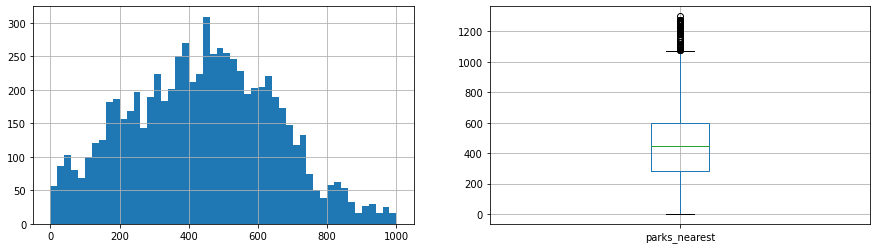

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(4)
fig.set_figwidth(15)

df[df.parks_nearest > 0].parks_nearest.hist(bins=50, range=(0, bins['parks_nearest']), ax=ax1)
df[(df.parks_nearest > 0) & (df.parks_nearest < 1300)].boxplot(['parks_nearest'], ax=ax2)

Так как видим что-то похожее на нормальное распределение, добавим гистограмму размаха.

В основном квартиры находятся от 300 до 600 метров от парка


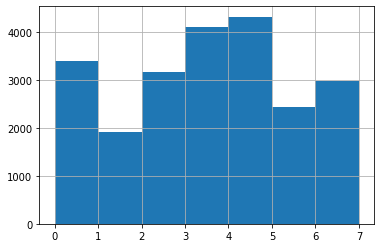

In [ ]:
df.day.hist(bins=7, range=(0, bins['day']))

Квартиры чаще всего выставляют со вторника по пятницу, ну и на выходных есть рост

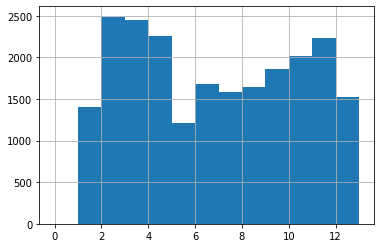

In [ ]:
df.month.hist(bins=bins['month'], range=(0, bins['month']))

Самые высокая активность с февраля по апрель, резкое падение в мае, вероятно в связи с майскими праздниками и дальнейший рост активности, ну и падение перед новогодними праздниками

#### Вывод

Ключевые параметры были разделены по количеству комнат, чтобы увидеть нормальное распределение и красивый бокс плот и сделаны заключения по графикам:
* Общая площадь
* Жилая площадь
* Площадь кухни
* Цена объекта

Остальные параметры были проанализированные с помощью гистограмм и гистограмм размаха:
* Количество комнат
* Высота потолков
* Этаж квартиры
* Количество этажей в доме
* Расстояние до центра
* Расстояние до ближайшего аэропорта
* Расстояние до ближайшего парка
* День, когда выставили объявление
    - Выставляют объявления со вторника по пятницу и чуть меньше на выходных
* Месяц, когда выставили объявление
    - Выявлены моменты, когда наступает спад продаж и рост

### Изучим как быстро продавались квартиры

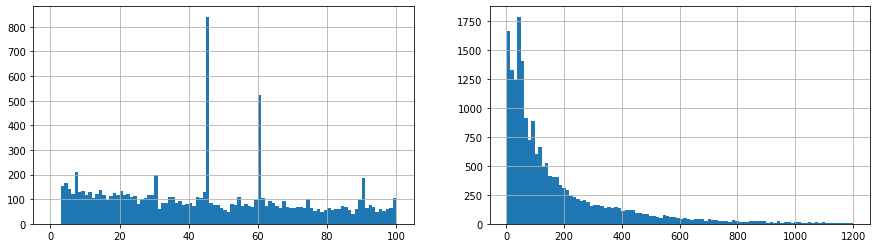

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
        
fig.set_figheight(4)
fig.set_figwidth(15)

days = 100
df[df.days_exposition > 0].days_exposition.hist(bins=days, range=(0, days), ax=ax1)

df[df.days_exposition > 0].days_exposition.hist(bins=100, ax=ax2)

Видим, два всплеска, возможно это связано с тем, за какое время чаще всего удаётся продать квартиру или же с самой площадкой объявлений\
Однако много квартир продаются дольше 800 дней, это больше двух лет

In [ ]:
print(f'Среднее: {df[df.days_exposition > 0].days_exposition.mean()}')
print(f'Медиана: {df[df.days_exposition > 0].days_exposition.median()}')

Среднее: 174.82481036173178
Медиана: 94.0


Среднее сильно отличается от медианы, значит данные неравномерные, т.е. есть недвижимость, которая продавалась очень долго, в данном случае от 800 дней, которая сдвигает среднее.

#### Выводы

* Основная доля недвижимости продаётся за 95 дней в среднем
* Долгой продажей могут считаться продажи дольше 200 дней, так как распределение экспоненциальное

### Изучим влияние параметров объявления на цену недвижимости

In [ ]:
corr = df.corr().last_price.reset_index().sort_values(by='last_price')

corr.columns = ['spec', 'last_price']

corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,spec,last_price
13,airports_nearest,-0.03
23,year,-0.03
14,city_centers_nearest,-0.03
24,city_centers_nearest_km,-0.02
9,studio,-0.02
21,day,-0.01
8,is_apartment,-0.00
22,month,0.00
10,open_plan,0.02
16,parks_nearest,0.03


Как видим, получилась корреляционная матрица зависимости цены от других параметров недвижимости.

Всё, что ниже 0.7 - не сильно влияет на цену относительно всех характеристик невижимости.

Выясним сильно ли влияют данные характеристики на цену:
* Общая площадь
* Жилая площадь
* Площадь кухни
* Количество комнат
* Этаж, на котором расположена квартира
* Дата размещения

In [ ]:
px.scatter(x=df['last_price'], y=df.total_area)

In [ ]:
px.scatter(x=df['last_price'], y=df.living_area)

In [ ]:
px.scatter(x=df['last_price'], y=df.kitchen_area)

In [ ]:
px.bar(df.groupby('rooms')['last_price'].median())

Далее идущие графики не показывают особой разницы между классами, то есть зависимости цены от ниже идущих параметров никакой нет

In [ ]:
px.bar(df.groupby('floor_type')['last_price'].median())

In [ ]:
px.bar(df.groupby('day')['last_price'].median())

In [ ]:
px.bar(df.groupby('month')['last_price'].median())

In [ ]:
px.bar(df[df.year > 2014].groupby('year')['last_price'].median())

Здесь видим небольшую закономерность, по цене, она резко падала с самого пикового значения начиная с 2015, вероятно из-за кризиса, когда цены были высокие, а потом постепенно поднималась, начиная от 2017 года, заканчивая 2019

#### Вывод

Влияние на цену производят данные переменные:
* Общая площадь
* Метраж кухни
* Жилая площадь
* Количество комнат

### Посчитаем среднюю цену одного кв. м. по 10 населённым пунктам с наибольшим количеством объявлений

In [ ]:
ten_largest = list(df.groupby(by='locality_name').count().reset_index().nlargest(10, 'floor').locality_name)
ten_largest

['санкт-петербург',
 'мурино',
 'шушары',
 'всеволожск',
 'пушкин',
 'колпино',
 'парголово',
 'гатчина',
 'деревня кудрово',
 'выборг']

In [ ]:
px.bar(df[df.locality_name.isin(ten_largest)].groupby(by='locality_name')['square_meter_price'].median().reset_index().sort_values(by='square_meter_price'), y='locality_name', x='square_meter_price', orientation='h')

#### Вывод

* В Санкт-Петербурге самая высокая цена за квадратный метр
* В Выборге самая низкая

### Посчитаем среднюю цену каждого километра

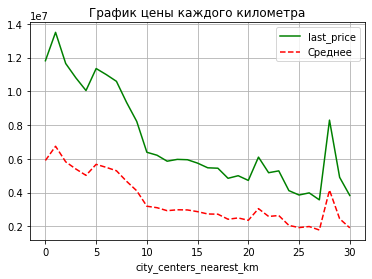

In [ ]:
s = df[df.locality_name.isin(['санкт-петербург'])].groupby(by='city_centers_nearest_km')['last_price'].mean().reset_index()

ax = s.plot(x='city_centers_nearest_km', y='last_price', color='g')

s.mean(1).plot(ax=ax, color='r', linestyle='--', label='Среднее', grid = True, title='График цены каждого километра')
ax.legend()
plt.show()

#### Вывод

На графике прекрасно видно: чем дальше от центра, тем ниже цена.

Выброс в конце вполне может быть какими-нибудь элитными посёлками загородом

## Общий вывод

* Проведена предобработка данных:
    - Обработаны и заполнены пропуски
    - Переименованы столбцы
    - Приведены типы
    - Обработаны строковые значения
    - Обработаны дубликаты
    - Обработаны аномальные значения
    - Потери данных 12% 
* Создали и добавили новые столбцы
* Проведён анализ датасета
    - Разбиты по количеству комнат и описаны статистические значения ключевых параметров объявления:
        * Выставляют объявления в основном в будни
        * Выявлена интересная закономерность выставления квартир по месяцам
    - После разбиения по ключевому признаку (количеству комнат) по одному, чтобы не усложнять исследование были выявлены закономерности и значения основной массы 50% наблюдений из выборки расспределённой по нормальному закону, что будет благоприятствовать длальнейшему построению качественной модели:
      * Однокомнатные:
        - Площадь от 25 до 50 кв. м.
        - Жилая площадь от 10 до 23 кв. м.
        - Площадь кухни от 5 до 15
        - Цена от 2 до 6 млн.
      * Двухкомнатные:
        - Площадь от 35 до 85 кв. м.
        - Жилая площадь от 25 до 40 кв. м.
        - Площадь кухни от 5 до 15
        - Цена от 2 до 7 млн.
      * Трёхкомнатные:
        - Площадь от 60 до 90 кв. м.
        - Жилая площадь от 35 до 55 кв. м.
        - Площадь кухни от 5 до 15
        - Цена от 2.5 до 10 млн.
    - Узнали, что большая доля квартир продаются в среднем за 95 дней
    - На цену влияют:
        - общая площадь
        - метраж кухни
        - жилая площадь
        - год выставления объявления
    - Посчитана средняя цена за кв. м. у 10 городов с наибольшим количеством объявлений:
        * Питер - максимальная цена за квадрат (чуть больше 100,000 руб)
        * Выборг - минимальная (чуть меньше 60,000 руб)
    - Чем ближе к центру Питера, тем дороже квартиры (за исключением предположительно элитных загородных районов)